<a href="https://colab.research.google.com/github/rodrigojss/API-usando-EF/blob/main/Ocorrencia_de_acidentes_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Para Upload pelo google colab
from google.colab import files
arq = files.upload()

Saving acidentes_2020-novo.csv to acidentes_2020-novo.csv


In [3]:
df = pd.read_csv("acidentes_2020-novo.csv", sep=";")

In [4]:
df.head()

,data,hora,natureza_acidente,situacao,bairro,endereco,numero,detalhe_endereco_acidente,complemento,bairro_cruzamento,num_semaforo,sentido_via,tipo,descricao,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,outros,vitimas,vitimasfatais,acidente_verificado,tempo_clima,situacao_semaforo,sinalizacao,condicao_via,conservacao_via,ponto_controle,situacao_placa,velocidade_max_via,mao_direcao,divisao_via1,divisao_via2,divisao_via3
0,2020-01-01,00:39:00,SEM VÍTIMA,CANCELADA,ÁGUA FRIA,RUA SAO SEBASTIAO,1687,NaN,EM FRENTE A IGREJA UNIVERSAL,ÁGUA FRIA,NaN,NaN,COLISÃO,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,01:04:00,SEM VÍTIMA,FINALIZADA,CORDEIRO,AV CAXANGA,1444,AV GENERAL SAN MARTIN,NaN,CORDEIRO,80.0,SUBURBIO,ABALROAMENTO LONGITUDINAL,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,NaN,60 km/h,Dupla,Canteiro central,NaN,NaN
2,2020-01-01,02:16:00,SEM VÍTIMA,FINALIZADA,AREIAS,AV RECIFE,NaN,NaN,LADO OPOSTO AO RESIDENCIAL IGNEZ ANDREAZZA,AREIAS,494.0,SUBURBIO,CHOQUE VEÍCULO PARADO,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Dupla,Canteiro central,NaN,NaN
3,2020-01-01,02:22:00,SEM VÍTIMA,FINALIZADA,BOA VIAGEM,AV BOA VIAGEM,NaN,NaN,EM FRENTE AO 1º JARDIM B. VIAGEM,BOA VIAGEM,NaN,CIDADE,COLISÃO TRASEIRA,COLISÃO ENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Longo da via,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,R-6a,NaN,Única,Faixa seccionada,NaN,NaN
4,2020-01-01,03:33:00,SEM VÍTIMA,FINALIZADA,PAISSANDU,AV GOVERNADOR AGAMENON MAGALHAES,NaN,NaN,CAIXA ECONÔMICA FEDERAL ILHA DO LEITE,PAISSANDU,672.0,SUBURBIO,ABALROAMENTO TRANSVERSAL,COLISÃOENTRE DOIS AUTOS S/V,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,Cruzamento,Bom,Sem defeito,Perfeito estado,Seca,Perfeito estado,Faixa de pedestre,Não há placas,NaN,Única,Faixa contínua,Faixa seccionada,Canteiro central


In [5]:
df.shape

(4092, 38)

In [95]:
df1 = df.drop(columns=["divisao_via1","divisao_via2","divisao_via3","outros","detalhe_endereco_acidente","complemento","numero","endereco","sentido_via","descricao","mao_direcao","situacao_placa","tempo_clima","situacao_semaforo","sinalizacao","condicao_via","conservacao_via","ponto_controle","situacao","bairro_cruzamento","vitimas","acidente_verificado","natureza_acidente","hora"])

In [96]:
df1.head()

,data,bairro,num_semaforo,tipo,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,vitimasfatais,velocidade_max_via
0,2020-01-01,ÁGUA FRIA,NaN,COLISÃO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-01,CORDEIRO,80.0,ABALROAMENTO LONGITUDINAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60 km/h
2,2020-01-01,AREIAS,494.0,CHOQUE VEÍCULO PARADO,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-01,BOA VIAGEM,NaN,COLISÃO TRASEIRA,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-01,PAISSANDU,672.0,ABALROAMENTO TRANSVERSAL,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [97]:
df1.shape

(4092, 14)

In [98]:
#Renomeando coluna "tipo"
df1 = df1.rename(columns={'tipo': 'tipo_acidente'})

In [99]:
df1.isnull().sum()

data                     0
bairro                  34
num_semaforo          2959
tipo_acidente            0
auto                   608
moto                  2400
ciclom                4073
ciclista              3940
pedestre              3937
onibus                3601
caminhao              3797
viatura               4020
vitimasfatais         4071
velocidade_max_via    2996
dtype: int64

In [100]:
df1.dtypes


data                   object
bairro                 object
num_semaforo          float64
tipo_acidente          object
auto                  float64
moto                  float64
ciclom                float64
ciclista              float64
pedestre              float64
onibus                float64
caminhao              float64
viatura               float64
vitimasfatais         float64
velocidade_max_via     object
dtype: object

In [101]:
#Tratando valores nulos
df1["bairro"].fillna("null", inplace = True)
df1["num_semaforo"].fillna(df1["num_semaforo"].mean(), inplace = True)
df1["auto"].fillna(df1["auto"].mean(), inplace = True)
df1["moto"].fillna(df1["moto"].mean(), inplace = True)
df1["ciclom"].fillna(df1["ciclom"].mean(), inplace = True)
df1["ciclista"].fillna(df1["ciclista"].mean(), inplace = True)
df1["pedestre"].fillna(df1["pedestre"].mean(), inplace = True)
df1["onibus"].fillna(df1["onibus"].mean(), inplace = True)
df1["caminhao"].fillna(df1["caminhao"].mean(), inplace = True)
df1["viatura"].fillna(df1["viatura"].mean(), inplace = True)
df1["vitimasfatais"].fillna(df1["vitimasfatais"].mean(), inplace = True)
df1["velocidade_max_via"].fillna("null", inplace = True)


In [102]:
df1.isnull().sum()

data                  0
bairro                0
num_semaforo          0
tipo_acidente         0
auto                  0
moto                  0
ciclom                0
ciclista              0
pedestre              0
onibus                0
caminhao              0
viatura               0
vitimasfatais         0
velocidade_max_via    0
dtype: int64

In [103]:
# Média de acidentes com automóveis por bairro
Media_aci_auto = round(df1.groupby("bairro")["auto"].mean(), 2)
Media_aci_auto.sample(10)

bairro
CAXANGÁ                 1.45
CASA AMARELA            1.39
TAMARINEIRA             1.65
CIDADE UNIVERSITÁRIA    1.45
BOA VISTA               1.54
ILHA DO LEITE           1.56
PORTO DA MADEIRA        1.25
ILHA JOANA BEZERRA      1.62
JAQUEIRA                1.36
GRAÇAS                  1.57
Name: auto, dtype: float64

In [104]:
#Somatório de vítimas fatais por bairro
Soma_aci_vitimas = round(df1.groupby("bairro")["vitimasfatais"].sum(), 1)
Soma_aci_vitimas.sample(40)

bairro
PORTO DA MADEIRA          3.8
SAN MARTIN               42.9
CÓRREGO DO JENIPAPO       3.8
AREIAS                   48.6
NOVA DESCOBERTA          24.8
SÃO JOSÉ                 82.0
CAMPO GRANDE             69.7
GUABIRABA                 5.7
ZUMBI                     6.7
COHAB                    10.5
BOMBA DO HEMETÉRIO        9.5
ALTO SANTA TERESINHA      3.8
JAQUEIRA                 10.5
AFLITOS                  12.4
PRADO                    42.9
ALTO JOSÉ BONIFÁCIO       7.6
CIDADE UNIVERSITÁRIA     10.5
APIPUCOS                 13.3
BREJO DE BEBERIBE         3.8
CURADO                    6.7
CAJUEIRO                  8.6
CAXANGÁ                  33.4
BOA VISTA               163.9
MORRO DA CONCEIÇÃO        3.8
ILHA DO LEITE            28.6
ALTO JOSÉ DO PINHO        9.5
SANTO ANTÔNIO            38.1
VÁRZEA                   82.9
TAMARINEIRA              45.7
CAÇOTE                    3.8
DOIS IRMÃOS              22.9
SÍTIO DOS PINTOS          5.7
BARRO                    29.5
CAS

In [105]:
# Ordenando valor do somatório de vítimas fatais por bairro, do maior para o menor
round(Soma_aci_vitimas.sort_values(ascending=False))


bairro
BOA VIAGEM            489.0
IMBIRIBEIRA           223.0
SANTO AMARO           168.0
BOA VISTA             164.0
MADALENA              147.0
                      ...  
BREJO DA GUABIRABA      3.0
SANTANA                 3.0
BRASÍLIA TEIMOSA        3.0
HIPÓDROMO               2.0
TOTÓ                    1.0
Name: vitimasfatais, Length: 92, dtype: float64

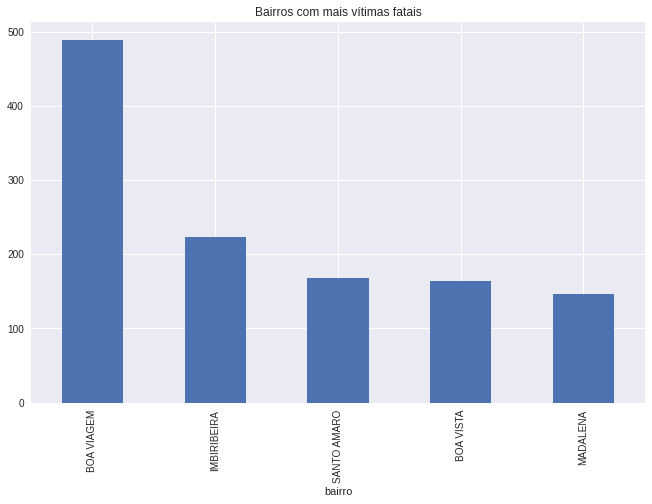

In [106]:
# Gráfico que mostra os 5 bairros com as maiores ocorrências de vítimas fatais
Soma_aci_vitimas.nlargest(5).plot.bar(title="Bairros com mais vítimas fatais", figsize=(11,7));


In [108]:
df1["data"] = df1["data"].astype("datetime64")


In [19]:
df1.dtypes

data                  datetime64[ns]
hora                  datetime64[ns]
bairro                        object
num_semaforo                 float64
tipo_acidente                 object
auto                         float64
moto                         float64
ciclom                       float64
ciclista                     float64
pedestre                     float64
onibus                       float64
caminhao                     float64
viatura                      float64
vitimasfatais                float64
velocidade_max_via            object
dtype: object

In [109]:
# É mostrado as tuplas referentes aos incidentes que sejam iguais a "ABALROAMENTO TRANSVERSAL" que tenham ocorrido no mês 5 
df1.loc[(df1['data'].dt.month == 5) & (df1['tipo_acidente'] == "ABALROAMENTO TRANSVERSAL")].sample(5)

,data,bairro,num_semaforo,tipo_acidente,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,vitimasfatais,velocidade_max_via
2513,2020-05-08,ENGENHO DO MEIO,279.771403,ABALROAMENTO TRANSVERSAL,1.000000,1.0,1.0,1.013158,1.103226,1.01833,1.023729,1.013889,0.952381,30 km/h
2598,2020-05-30,CAÇOTE,279.771403,ABALROAMENTO TRANSVERSAL,1.000000,1.0,1.0,1.013158,1.103226,1.01833,1.023729,1.013889,0.952381,null
2579,2020-05-25,JARDIM SÃO PAULO,279.771403,ABALROAMENTO TRANSVERSAL,1.000000,1.0,1.0,1.013158,1.103226,1.01833,1.023729,1.013889,0.952381,null
2545,2020-05-15,CASA AMARELA,136.000000,ABALROAMENTO TRANSVERSAL,1.475029,2.0,1.0,1.013158,1.103226,1.01833,1.023729,1.013889,0.952381,null
2555,2020-05-17,TORRE,106.000000,ABALROAMENTO TRANSVERSAL,1.475029,1.0,1.0,1.013158,1.103226,1.00000,1.023729,1.013889,0.952381,null


In [111]:
#Somatório de vítimas fatais por mês
So_vitimas_fatais_mes = round(df1.groupby(df1["data"].dt.month)["vitimasfatais"].sum())
So_vitimas_fatais_mes

data
1     898.0
2     868.0
3     517.0
4      81.0
5     120.0
6     157.0
7     227.0
8     173.0
9     173.0
10    206.0
11    258.0
12    218.0
Name: vitimasfatais, dtype: float64

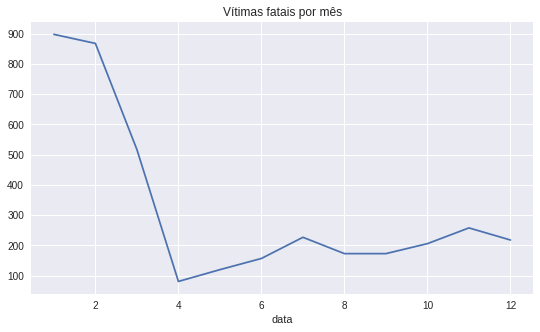

In [22]:
#Gráfico referente ao somatório de vítimas fatais por mês
So_vitimas_fatais_mes.plot(title = "Vítimas fatais por mês", figsize=(9,5));

In [90]:
# Ocorrencia de acidentes por bairro
Ocor_acidentes_bairro = df1["bairro"].value_counts()
Ocor_acidentes_bairro

BOA VIAGEM            513
IMBIRIBEIRA           234
SANTO AMARO           176
BOA VISTA             172
MADALENA              154
                     ... 
BREJO DA GUABIRABA      3
SANTANA                 3
BRASÍLIA TEIMOSA        3
HIPÓDROMO               2
TOTÓ                    1
Name: bairro, Length: 92, dtype: int64

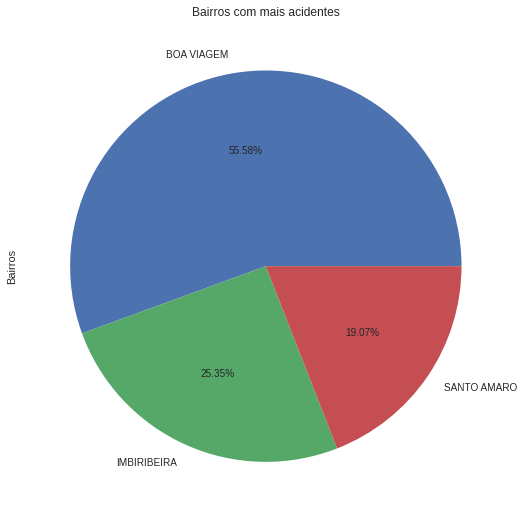

In [24]:
#Gráfico mostrando os 3 bairros com as maiores ocorrencia de acidentes
Ocor_acidentes_bairro.nlargest(3).plot(kind = "pie", autopct='%0.2f%%', figsize=(9,9), title ="Bairros com mais acidentes", label = "Bairros");


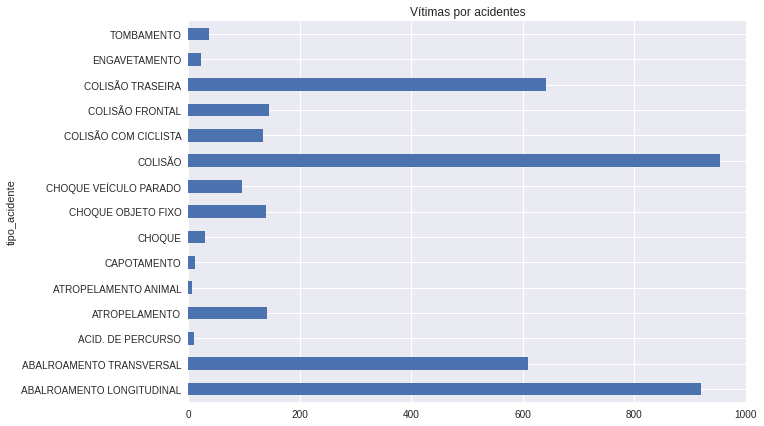

In [244]:
#Gráfico que mostra o somatório de vítimas fatais agrupando pelo respectivo tipo de acidente 
df1.groupby("tipo_acidente")["vitimasfatais"].sum().plot.barh(figsize=(10,7), title="Vítimas por acidentes");

In [255]:
#Amostra que seleciona apenas incidentes do tipo "ABALROAMENTO TRANSVERSAL"
df1.loc[(df1['tipo_acidente'] == "ABALROAMENTO TRANSVERSAL")].sample(5)


,data,hora,bairro,num_semaforo,tipo_acidente,auto,moto,ciclom,ciclista,pedestre,onibus,caminhao,viatura,vitimasfatais,velocidade_max_via
1965,2020-03-04,2021-08-26 08:38:00,CAMPO GRANDE,279.771403,ABALROAMENTO TRANSVERSAL,2.000000,1.086288,1.0,1.013158,1.103226,1.01833,1.023729,1.013889,0.952381,null
3576,2020-10-29,2021-08-26 12:44:00,VÁRZEA,279.771403,ABALROAMENTO TRANSVERSAL,1.475029,1.000000,1.0,1.013158,1.103226,1.00000,1.023729,1.013889,0.952381,null
3187,2020-08-31,2021-08-26 17:22:00,CASA AMARELA,677.000000,ABALROAMENTO TRANSVERSAL,1.000000,1.000000,1.0,1.013158,1.103226,1.01833,1.023729,1.013889,0.952381,null
2506,2020-05-06,2021-08-26 16:03:00,PRADO,52.000000,ABALROAMENTO TRANSVERSAL,1.475029,1.000000,1.0,1.013158,1.103226,1.01833,1.023729,1.000000,0.952381,null
2513,2020-05-08,2021-08-26 14:45:00,ENGENHO DO MEIO,279.771403,ABALROAMENTO TRANSVERSAL,1.000000,1.000000,1.0,1.013158,1.103226,1.01833,1.023729,1.013889,0.952381,30 km/h


In [112]:
df.to_csv("df_Ocorr_aci_2020.csv", index = False)